<a href="https://colab.research.google.com/github/daishek/bigdata-univ/blob/main/tp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Développement d'un modèle

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [5]:
path = "automobileEDA.csv"

df = pd.read_csv(path)

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Simple Linear Regression

In [14]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

### Highway-mpg x Price

In [17]:
X = df[['highway-mpg']]
Y = df['price']
lm.fit(X, Y)

Yhat = lm.predict(X)

In [19]:
# => b0
lm.intercept_

38423.3058581574

In [21]:
# => b1
lm.coef_

array([-821.73337832])

*The relation between 'highway-mpg' and 'price'*

Price = 38423.3058581574 - 821.73337832 * highway-mpg

### Engine-size x Price

In [22]:
X = df[['engine-size']]
Y = df['price']
lm.fit(X, Y)

Yhat = lm.predict(X)

In [23]:
# => b0
lm.intercept_

-7963.338906281042

In [24]:
# => b0
lm.coef_

array([166.86001569])

*The relation between 'engine-size' and 'price'*

Price = 166.86001569 * engine-size - 7963.338906281042

### 1.1. Évaluation du modèle à l'aide de la visualisation

In [25]:
import seaborn as sns
%matplotlib inline

<Axes: xlabel='highway-mpg', ylabel='price'>

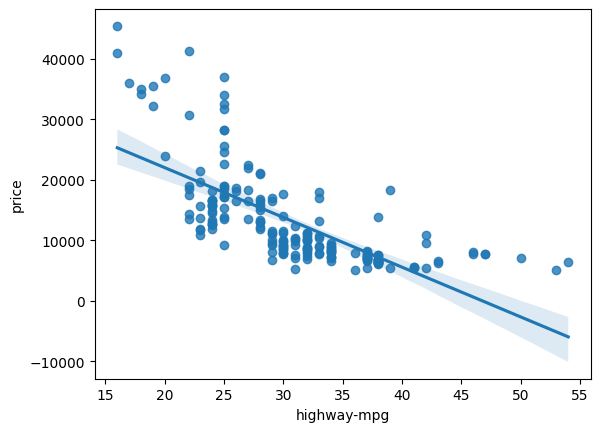

In [26]:
sns.regplot(x="highway-mpg", y="price", data=df)

<Axes: xlabel='engine-size', ylabel='price'>

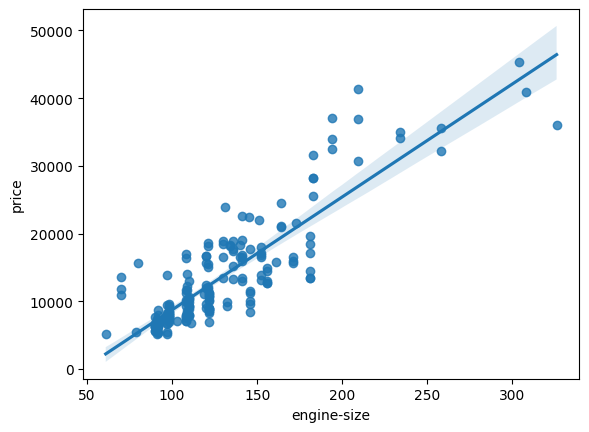

In [27]:
sns.regplot(x="engine-size", y="price", data=df)

Nous pouvons constater que le prix est corrélé positivement avec engine-size

### 1.2. Mesures pour l'évaluation dans l'échantillon